In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.geoaxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
from matplotlib import font_manager
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patheffects as path_effects

plt.rcParams['font.sans-serif'] = 'Microsoft YaHei' # 设置默认中文字体

In [2]:
data = gpd.read_file('30m以上大坝分布数量top10国家.geojson') # 读入原始数据

In [3]:
# 构建自定义调色盘，这里的颜色是从原图中取色得到的
# 并且对原图中的色彩映射偏差进行了校正
custom_cmap = LinearSegmentedColormap.from_list("", ['#c28f67', '#542603'])
custom_cmap_rank = LinearSegmentedColormap.from_list("", ['#d0a893', '#ae7750'])

In [4]:
# 读入大坝象形logo图片
logo = plt.imread('logo.png')

In [5]:
# 分别为左右半球设置对应中心坐标的正射投影
crs_left = ccrs.Orthographic(*(-105.16875,-6.256468))
crs_right = ccrs.Orthographic(*(75.371489, -0.625033))

In [6]:
# 得到图例中的上下渐变logo
transform_logo = logo.copy()

for row in range(transform_logo.shape[0]):
    for col in range(transform_logo.shape[1]):
        if transform_logo[row, col, -1] == 1:
            transform_logo[row, col, -1] -= row / transform_logo.shape[0]

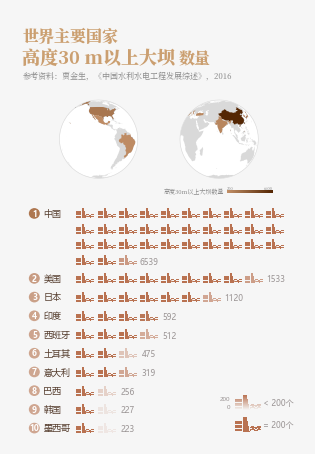

In [7]:
# 开辟父级图床，其中长宽比参考了原图的比例
fig, ax = plt.subplots(figsize=(5.4, 8.1))

# 构建左半球图像
map_left = inset_axes(ax, width='100%', height='100%', 
                      bbox_to_anchor=(0.19, 0.58, 0.26, 0.26),
                      bbox_transform=ax.transAxes,
                      axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                      axes_kwargs=dict(map_projection=crs_left))

# 添加陆地面并设置颜色
map_left.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                            edgecolor='none', 
                                            facecolor='#d9d9d9'))

# 为不同国家添加面要素并按照归一化数值上色
for country in ["美国", "墨西哥", "巴西"]:
    map_left.add_geometries(data.query('国家 == @country').geometry,
                            crs=ccrs.PlateCarree(),
                            facecolor=custom_cmap(data.query('国家==@country').iat[0, -2]),
                            zorder=999)

# 设置画框样式
map_left.spines['geo'].set_linewidth(0.6)
map_left.spines['geo'].set_color('#d9d9d9')

# 构建右半球图像
map_right = inset_axes(ax, width='100%', height='100%', 
                       bbox_to_anchor=(0.59, 0.58, 0.26, 0.26),
                       bbox_transform=ax.transAxes,
                       axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                       axes_kwargs=dict(map_projection=crs_right))

# 添加陆地面并设置颜色
map_right.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                            edgecolor='none', 
                                            facecolor='#d9d9d9'))
# 为不同国家添加面要素并按照归一化数值上色
for country in ["日本", "韩国", "中国", "印度", "西班牙", "意大利", "土耳其"]:
    map_right.add_geometries(data.query('国家 == @country').geometry,
                      crs=ccrs.PlateCarree(),
                      facecolor=custom_cmap(data.query('国家==@country').iat[0, -2]),
                      zorder=999)

# 设置画框样式
map_right.spines['geo'].set_linewidth(0.6)
map_right.spines['geo'].set_color('#d9d9d9')


# 标注一些文字
ax.text(0.05, 0.92, '世界主要国家', 
        fontsize=16, 
        fontproperties=font_manager.FontProperties(fname='NotoSerifSC-Black.otf'),
        color='#cb9f70')

ax.text(0.05, 0.87, '高度30 m以上大坝', 
        fontsize=18, 
        fontproperties=font_manager.FontProperties(fname='NotoSerifSC-Black.otf'),
        color='#cb9f70')

ax.text(0.57, 0.87, '数量', 
        fontsize=16, 
        fontproperties=font_manager.FontProperties(fname='NotoSerifSC-Black.otf'),
        color='#cb9f70')

ax.text(0.05, 0.838, '参考资料：贾金生，《中国水利水电工程发展综述》，2016', 
        fontsize=8, 
        fontproperties=font_manager.FontProperties(fname='NotoSerifSC-Medium.otf'),
        color='#8d8d8d')

# 插入比色卡
color_bar = ax.inset_axes((0.73, 0.53, 0.15, 0.1))
color_bar.imshow(np.row_stack([np.linspace(0, 1, 100), np.linspace(0, 1, 100)]*4), cmap=custom_cmap)
color_bar.axis('off')

# 标注一些文字
ax.text(0.52, 0.58, '高度30m以上大坝数量', 
        fontsize=6, 
        va='center',
        fontproperties=font_manager.FontProperties(fname='NotoSerifSC-Medium.otf'),
        color='#8d8d8d')

ax.text(0.73, 0.588, '200', 
        fontsize=4, 
        va='center',
        fontproperties=font_manager.FontProperties(fname='NotoSerifSC-Medium.otf'),
        color='#8d8d8d')

ax.text(0.851, 0.588, '6600', 
        fontsize=4, 
        va='center',
        fontproperties=font_manager.FontProperties(fname='NotoSerifSC-Medium.otf'),
        color='#8d8d8d')

# 象形图部分
top_y = 0.53
for row in data.itertuples():
    
    # 辅助logo数量及换行布局
    N = round(row.高度30米以上大坝数量 / 200)
    
    if row.Index == 0:
        
        # # 标注一些文字
        ax.text(0.12, top_y, row.国家, 
                fontsize=9, 
                va='center',
                color='#553d2e')
        
        # 绘制排名底部的托盘，画椭圆是为了与父级图床长宽比对应从而得到圆形~
        ax.add_collection(PatchCollection([mpatches.Ellipse((0.09, top_y), 
                                                            8.1 * 0.0045, 5.4 * 0.0045)], 
                                          facecolor=custom_cmap_rank(row.归一化值)))

        ax.text(0.09, top_y, row.Index+1, 
                fontsize=8, 
                va='center',
                ha='center',
                color='white',
                weight='bold')
        
    else:
        ax.text(0.12, top_y-0.035, row.国家, 
                fontsize=9, 
                va='center',
                color='#553d2e')

        ax.add_collection(PatchCollection([mpatches.Ellipse((0.09, top_y-0.035), 
                                                            8.1 * 0.0045, 5.4 * 0.0045)], 
                                          facecolor=custom_cmap_rank(row.归一化值)))

        ax.text(0.09, top_y-0.035, row.Index+1, 
                fontsize=8, 
                va='center',
                ha='center',
                color='white',
                weight='bold')
    
    
    # 利用嵌套循环和条件判断来绘制每个logo，
    # 代码虽然看起来多，但是基本上写完一段后面都是复制粘贴很简单~
    imagebox = OffsetImage(logo, zoom=0.02)

    if N / 10 > 1:
        for row_idx in range(int((N / 10))):

            for i in range(10):

                ab = AnnotationBbox(imagebox, (0.26+0.07*i, top_y-row_idx*0.035), frameon=False)

                ax.add_artist(ab)

        for i in range(N // 10 - 1):
            ab = AnnotationBbox(imagebox, (0.26+0.07*i, top_y-(row_idx+1)*0.035), frameon=False)

            ax.add_artist(ab)

        imagebox = OffsetImage(logo, zoom=0.02, alpha=row.高度30米以上大坝数量 % 200 / 200)

        ab = AnnotationBbox(imagebox, (0.26+0.07*(i+1), top_y-(row_idx+1)*0.035), frameon=False)

        ax.add_artist(ab)
        
        ax.text(0.26+0.07*(i+2), top_y-(row_idx+1)*0.035-0.004, row.高度30米以上大坝数量, 
                fontsize=8, 
                va='center',
                ha='center',
                color='#9a9494')

        top_y = top_y-(row_idx+1)*0.035-0.0075
        
    else:
        for i in range(N):
            ab = AnnotationBbox(imagebox, (0.26+0.07*i, top_y-0.035), frameon=False)

            ax.add_artist(ab)

        imagebox = OffsetImage(logo, zoom=0.02, alpha=row.高度30米以上大坝数量 % 200 / 200)

        ab = AnnotationBbox(imagebox, (0.26+0.07*(i+1), top_y-0.035), frameon=False)

        ax.add_artist(ab)

        ax.text(0.26+0.07*(i+2), top_y-0.035-0.002, row.高度30米以上大坝数量, 
                fontsize=8, 
                va='center',
                ha='center',
                color='#9a9494')

        top_y = top_y-(int((N / 10))+1)*0.035-0.0075
        
# 绘制右下角图例
imagebox = OffsetImage(transform_logo, zoom=0.03)

ab = AnnotationBbox(imagebox, (0.8, 0.1), frameon=False)

ax.add_artist(ab)

imagebox = OffsetImage(logo, zoom=0.03)

ab = AnnotationBbox(imagebox, (0.8, 0.05), frameon=False)

ax.add_artist(ab)

# 添加一些文字
ax.text(0.9, 0.1,'< 200个', 
        fontsize=8, 
        va='center',
        ha='center',
        color='#9a9494')

ax.text(0.9, 0.05,'= 200个', 
        fontsize=8, 
        va='center',
        ha='center',
        color='#9a9494')

ax.text(0.74, 0.09,'0', 
        fontsize=6, 
        va='center',
        ha='right',
        color='#9a9494')

ax.text(0.74, 0.11,'200', 
        fontsize=6, 
        va='center',
        ha='right',
        color='#9a9494')


# 设置axe区域以及figure区域的背景色
ax.set_facecolor('#f6f6f6')
fig.set_facecolor('#f6f6f6')

# 关闭父级axe的坐标轴
ax.axis('off')

# 保存图像
fig.savefig('图6.png', dpi=500, bbox_inches='tight', pad_inches=0)